<a href="https://colab.research.google.com/github/Danielarojas845/Data_Science/blob/main/Proyecto_M4_Modelado_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Nº4: Daniela Rojas.

## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

#Librerías

In [ ]:
#Importamos las librerias necesarias

import pandas as pd
import numpy as np
from  functools import reduce

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import KElbowVisualizer

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#Se habilita la descarga a traves del Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

#Se carga el archivo solicitado

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bootcamp UDD/PROYECTO 4, ARCHIVO /costumers.csv", encoding="utf-8-sig")

**EDA: Análisis Exploratorio de Datos, es un paso muy importante previo a la aplicacion de modelos o tomar decisiones**

In [ ]:
df.head() # Ver primeras 5 filas

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


In [ ]:
df.info() # Mostrar información del dataset, se puede observar la completitud al 100%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


El Dataset cuenta con 100% de completitud.

In [ ]:
df.shape

(500, 6)

El dataset cuenta con 500 filas y 6 columnas.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00


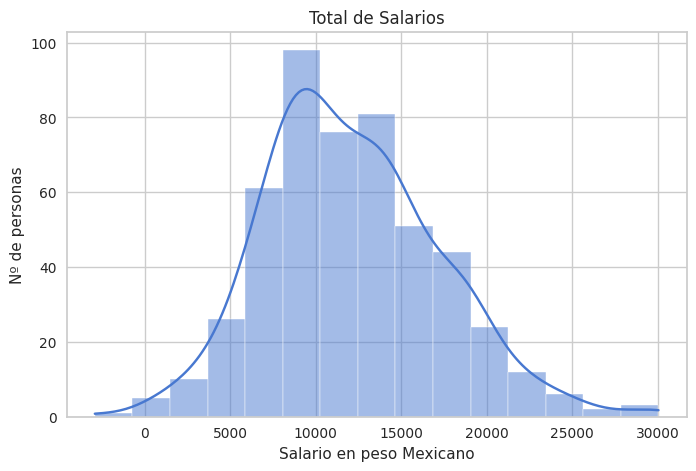

In [ ]:
sns.set_style("whitegrid")  # Fondo con cuadrícula suave
sns.set_palette("muted")   # Colores suaves

plt.figure(figsize=(8, 5))
sns.histplot(df['Salario'], bins=15, kde=True)
plt.title("Total de Salarios")
plt.xlabel('Salario en peso Mexicano')
plt.ylabel("Nº de personas")
plt.show()

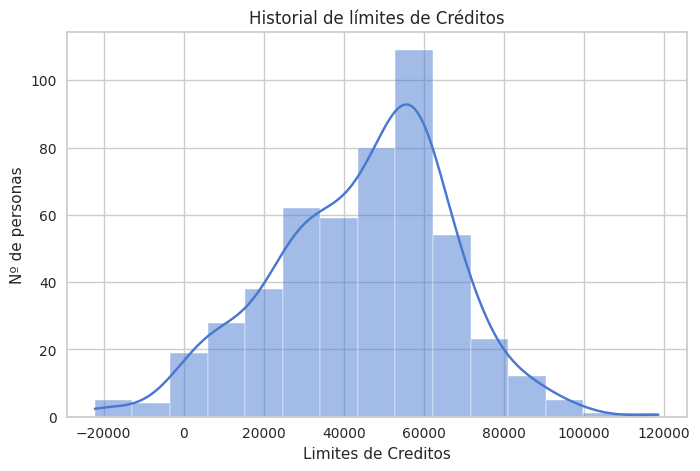

In [ ]:
sns.set_style("whitegrid")  # Fondo con cuadrícula suave
sns.set_palette("muted")   # Colores suaves

plt.figure(figsize=(8, 5))
sns.histplot(df['Limite_TC'], bins=15, kde=True)
plt.title("Historial de límites de Créditos")
plt.xlabel('Limites de Creditos')
plt.ylabel("Nº de personas")
plt.show()

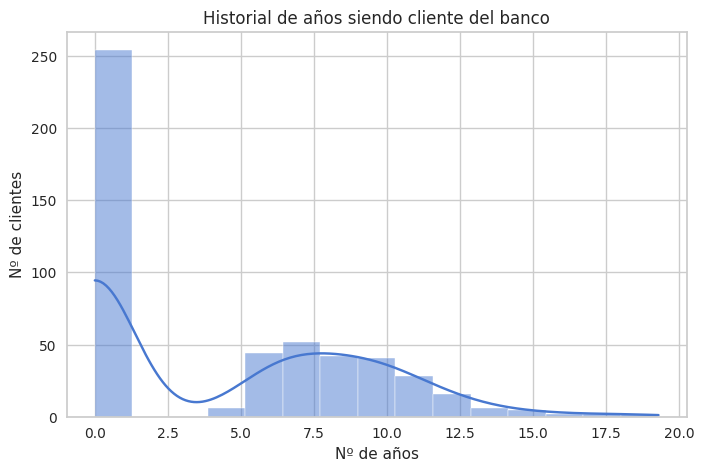

In [ ]:
sns.set_style("whitegrid")  # Fondo con cuadrícula suave
sns.set_palette("muted")

plt.figure(figsize=(8, 5))
sns.histplot(df['Tiempo_cliente'], bins=15, kde=True)
plt.title("Historial de años siendo cliente del banco")
plt.xlabel('Nº de años')
plt.ylabel("Nº de clientes")
plt.show()

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
495,False
496,False
497,False
498,False


In [ ]:
df.drop_duplicates(inplace=True) # Eliminar duplicados

In [ ]:
df.shape

(500, 6)

In [ ]:
df['Credito_tipo_1'].value_counts()

,count
Credito_tipo_1,
1,305
0,195


In [ ]:
df['Credito_tipo_2'].value_counts()

,count
Credito_tipo_2,
0,271
1,229


In [ ]:
df['Producto_ofrecido'].value_counts()

,count
Producto_ofrecido,
1,301
0,199


In [ ]:
int_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns

In [ ]:
print("Columnas con tipo int64:", list(int_columns))
print("Columnas con tipo float64:", list(float_columns))

Columnas con tipo int64: ['Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido']
Columnas con tipo float64: ['Salario', 'Limite_TC', 'Tiempo_cliente']


Detalle de las variables:

- VARIABLES CONTINUAS, float64. (c_feats)
- VARIABLES DISCRETAS, int (v_feats)
- VARIABLES CATEGOTICAS, object o category.

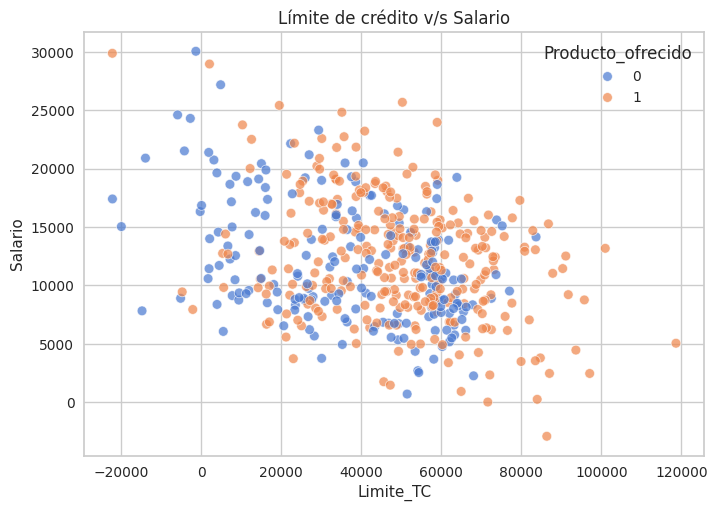

In [ ]:
# Scatter plot entre salario y experiencia
sns.scatterplot(df, x='Limite_TC', y='Salario', hue='Producto_ofrecido', palette='muted', alpha=0.7, legend=True)
plt.title('Límite de crédito v/s Salario')
plt.xlabel('Limite_TC')
plt.ylabel('Salario')
plt.show()

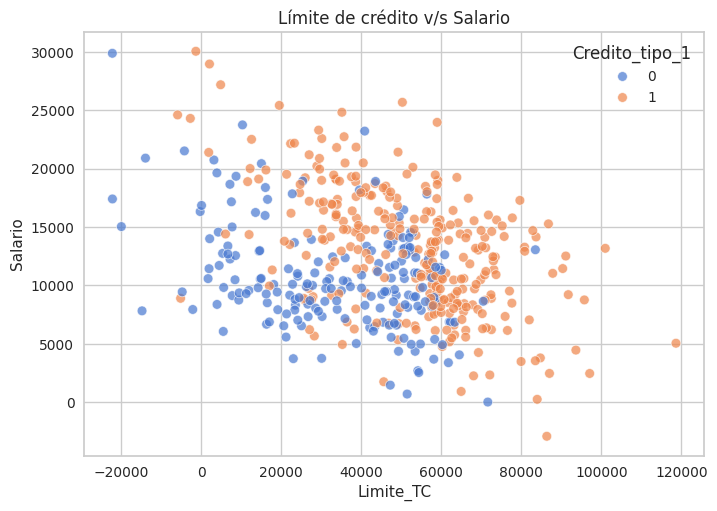

In [ ]:
# Scatter plot entre salario y experiencia
sns.scatterplot(df, x='Limite_TC', y='Salario', hue='Credito_tipo_1', palette='muted', alpha=0.7, legend=True)
plt.title('Límite de crédito v/s Salario')
plt.xlabel('Limite_TC')
plt.ylabel('Salario')
plt.show()

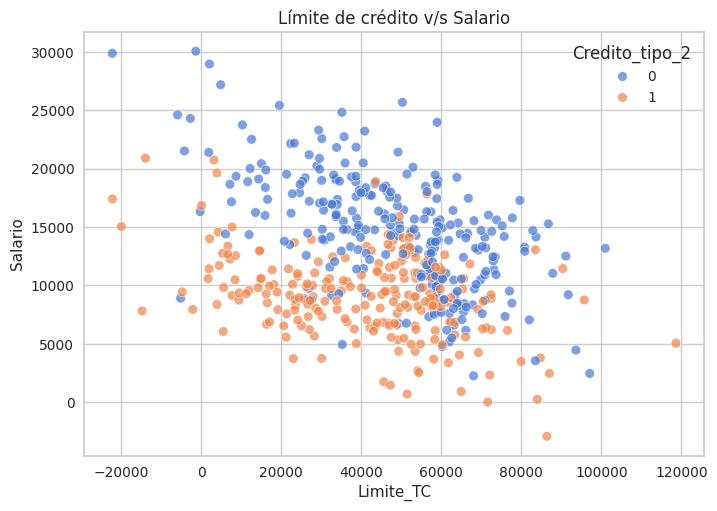

In [ ]:
# Scatter plot entre salario y experiencia
sns.scatterplot(df, x='Limite_TC', y='Salario', hue='Credito_tipo_2', palette='muted', alpha=0.7, legend=True)
plt.title('Límite de crédito v/s Salario')
plt.xlabel('Limite_TC')
plt.ylabel('Salario')
plt.show()

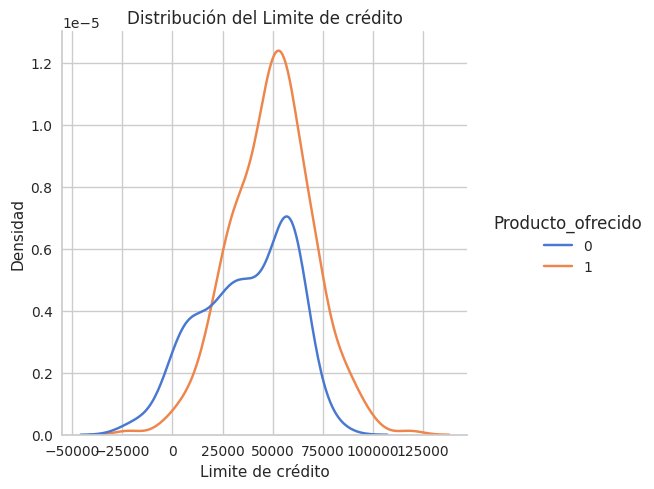

In [ ]:
sns.displot(df, x='Limite_TC',hue='Producto_ofrecido',palette="muted",kind='kde',legend=True);
plt.title("Distribución del Limite de crédito")
plt.xlabel("Limite de crédito")
plt.ylabel("Densidad")
plt.show()

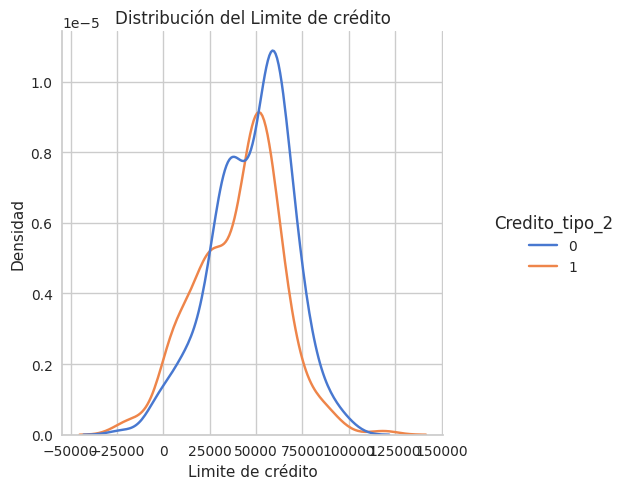

In [ ]:
sns.displot(df, x='Limite_TC',hue='Credito_tipo_2',palette="muted",kind='kde',legend=True);
plt.title("Distribución del Limite de crédito")
plt.xlabel("Limite de crédito")
plt.ylabel("Densidad")
plt.show()

In [ ]:
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


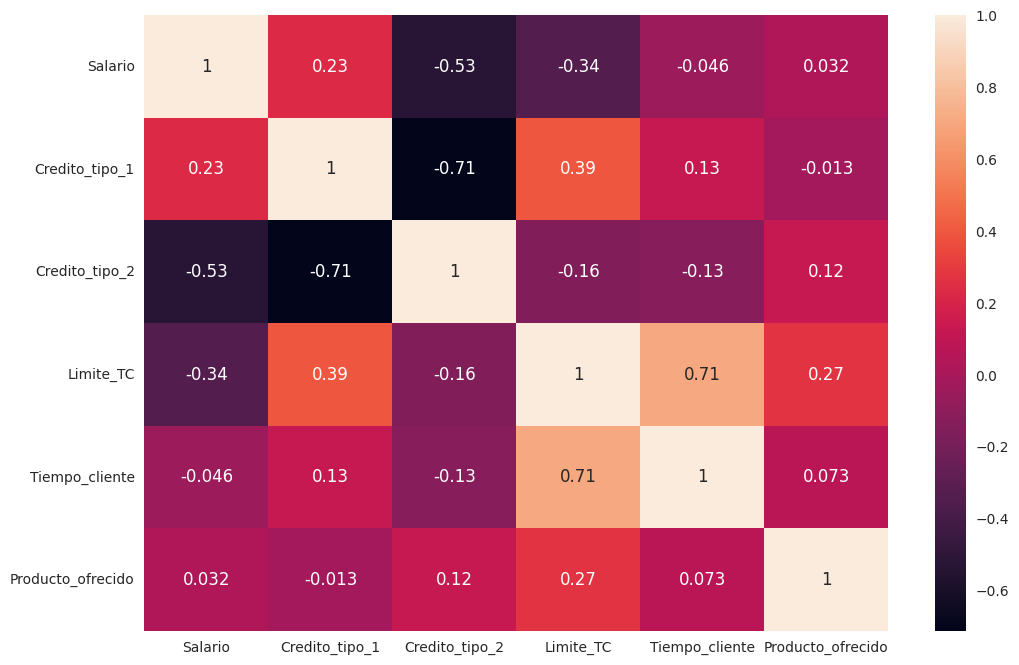

In [ ]:
# Heatmap de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))  # Ancho de 12, alto de 8 (puedes cambiar estos valores)

# Crear el mapa de calor
sns.heatmap(df.corr(), annot=True)

# Mostrar el gráfico
plt.show()

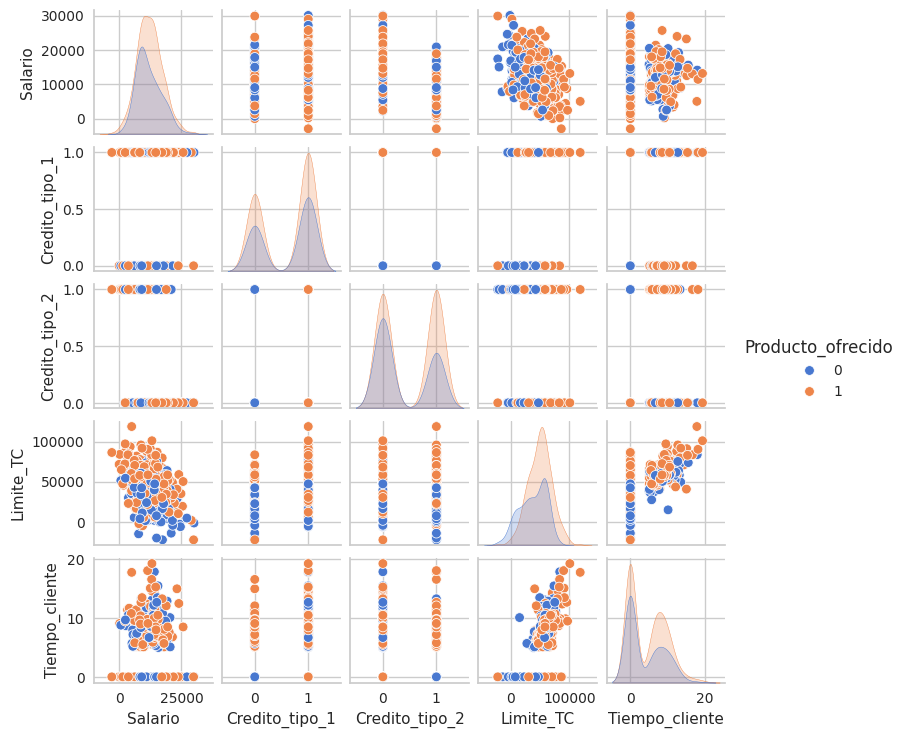

In [ ]:
sns.pairplot(df, hue='Producto_ofrecido', height=1.5)
plt.show()

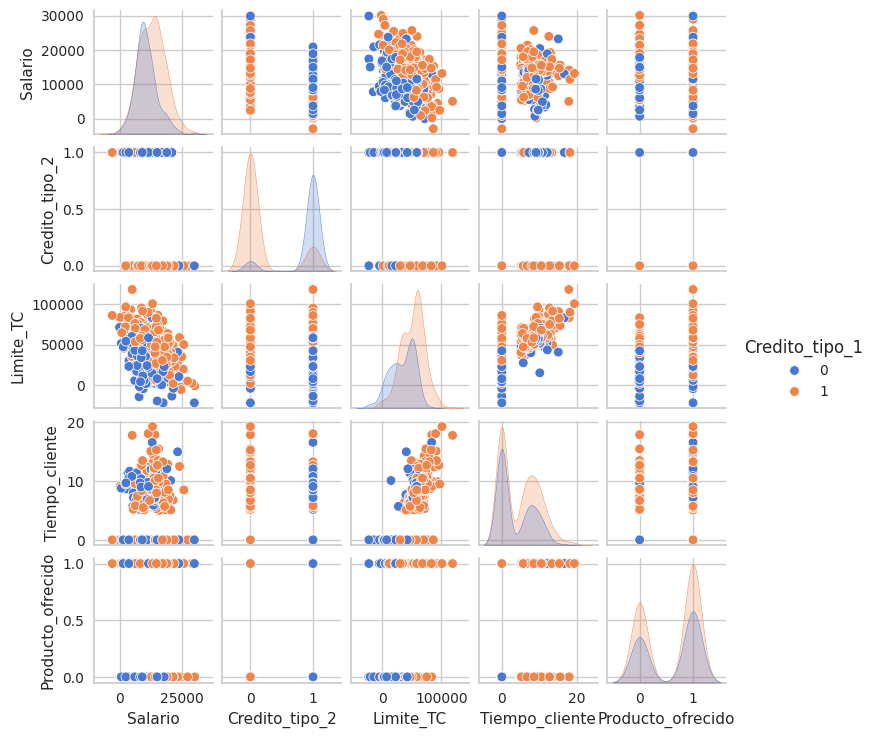

In [ ]:
sns.pairplot(df, hue='Credito_tipo_1', height=1.5)
plt.show()

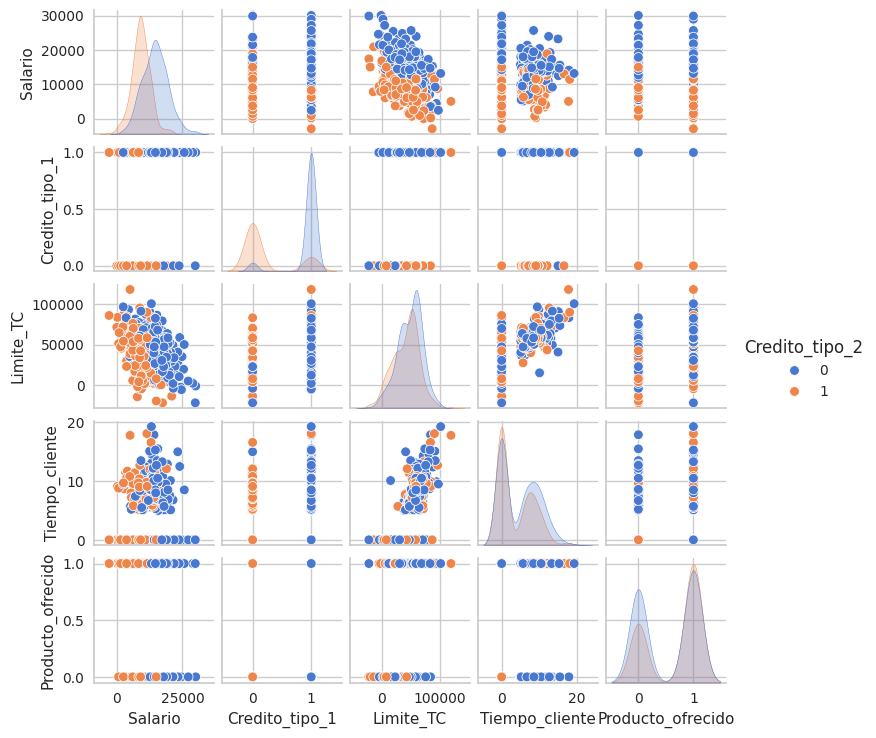

In [ ]:
sns.pairplot(df, hue='Credito_tipo_2', height=1.5)
plt.show()

**A traves de los siguientes graficos de histograma (unidos), es posible observar rapidamente y realizar una comparación entre grupos. Se puede observar, la simetría, con distribucion normal, o sesgo a la derecha o izquierda, frecuencia de valores, valores atípicos o Outlier, rango, dispersion.**

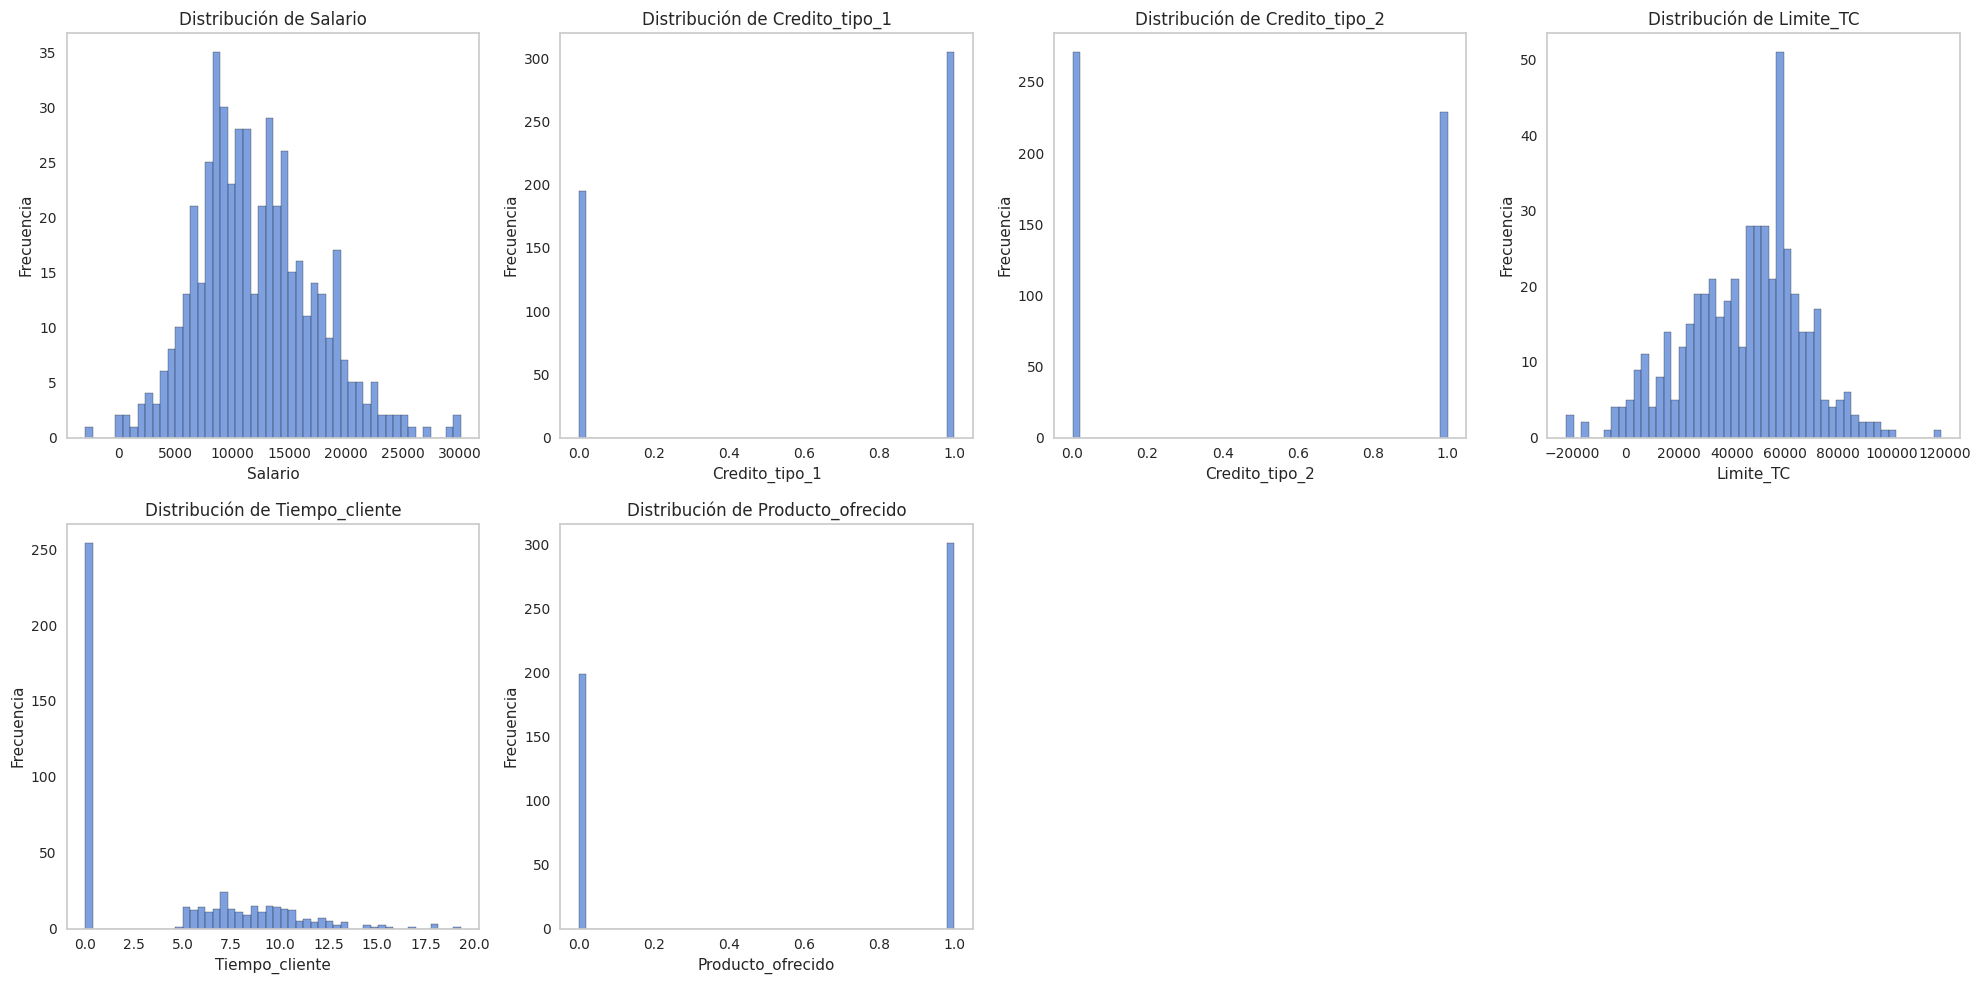

In [ ]:
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = df.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(df[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

**A traves de los Diagrama de caja, tambiém es posible ver los Oulier**.

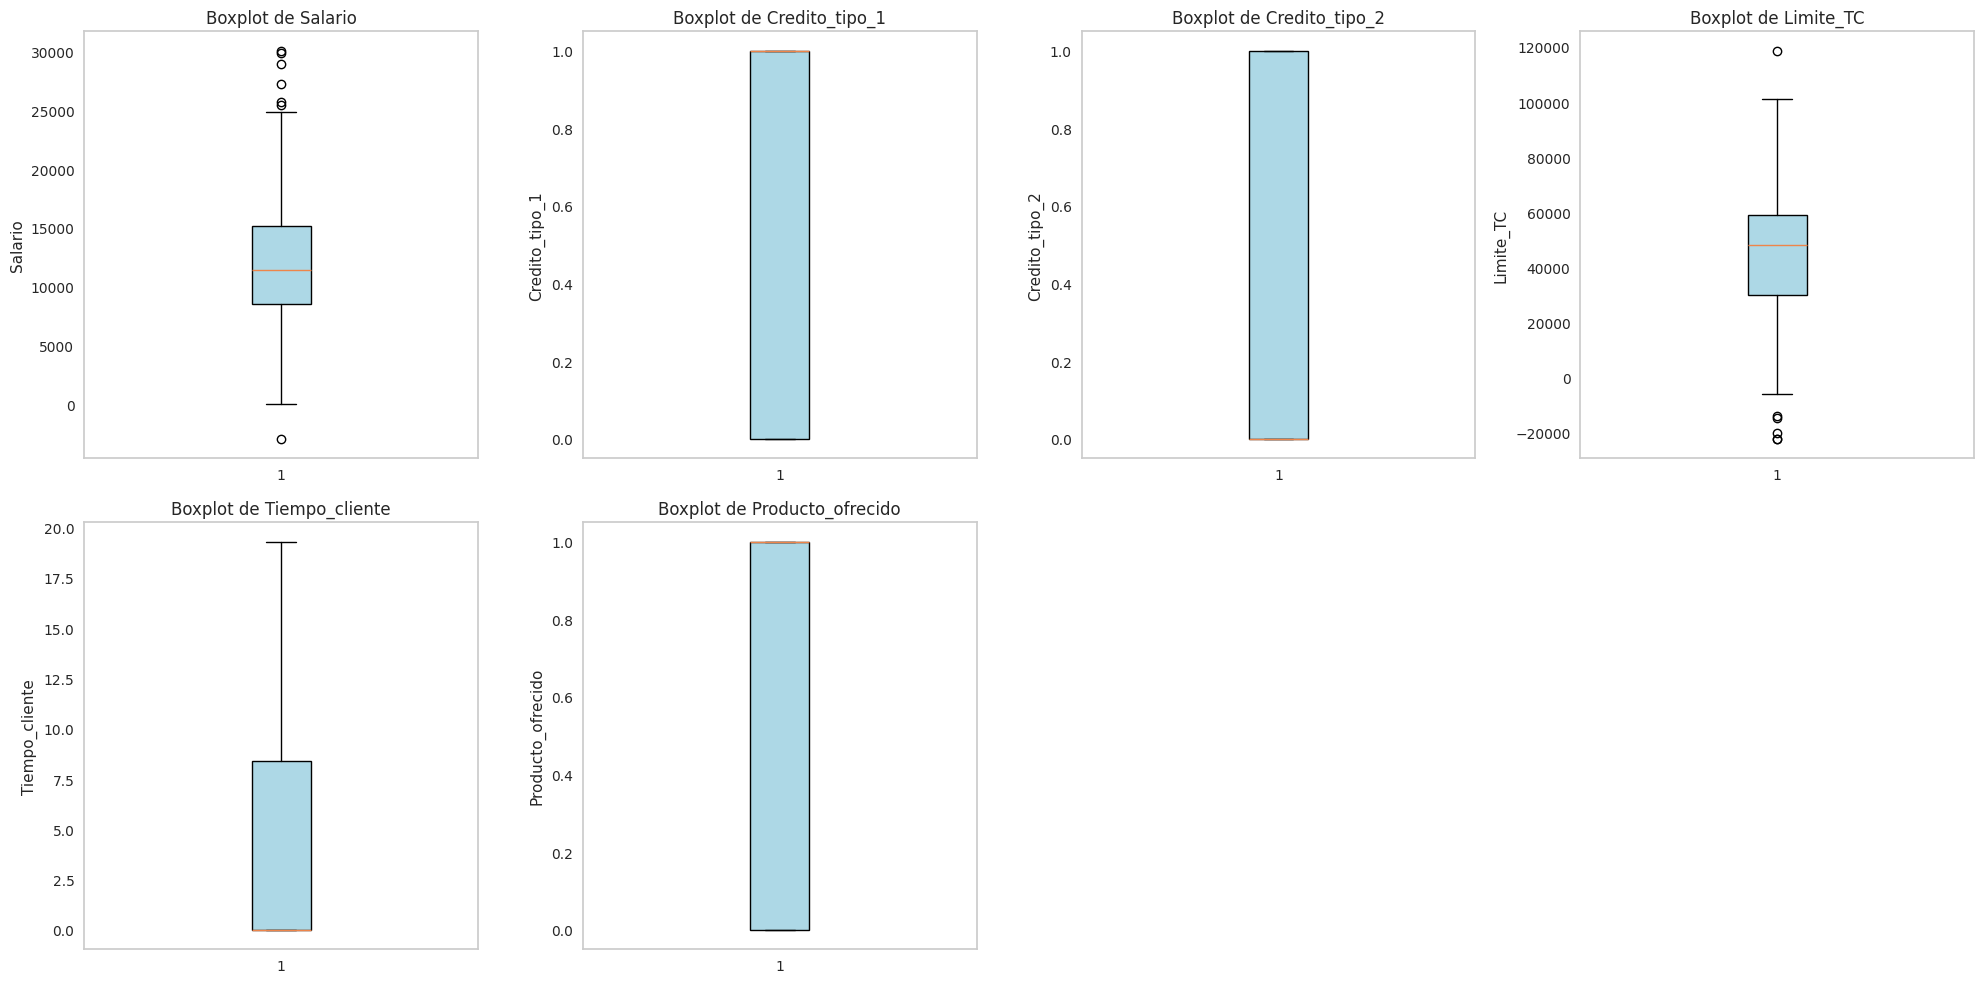

In [ ]:
import matplotlib.pyplot as plt

# Variables del dataset
variables = df.columns
num_vars = len(variables)
cols = 4
rows = (num_vars + cols - 1) // cols

# Crear subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Generar boxplots para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.boxplot(df[var].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_title(f'Boxplot de {var}')
    ax.set_ylabel(var)
    ax.grid()

# Eliminar los ejes vacíos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
variables_continuas = ('Salario', 'Limite_TC', 'Tiempo_cliente')

In [ ]:
# Identificacion e imputación de outliers
# Definir límites de outliers utilizando el método IQR
# Generamos un diccionario vacío donde guardaremos la información
outliers_df = {}
# Recorremos las columnas continuas
for col in variables_continuas:
# Si la columna aun está en el dataframe realizamos el análisis
  if col in df.columns:
# Calculo del IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identificación de outliers
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_df[col] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': outliers.shape[0]}
# Convertir el diccionario en DataFrame para mejor visualización
df_outliers = pd.DataFrame(outliers_df).T
# Ordenamos de menor a mayor según el número de outliers
df_outliers.sort_values(by='Num_Outliers')

,Lower_Bound,Upper_Bound,Num_Outliers
Tiempo_cliente,-12.60000,21.00000,0.0
Limite_TC,-13421.55000,102626.01000,6.0
Salario,-1421.32625,25127.14375,7.0


**Despues de identificar los Outlier, se debe tomar la desición si se eliminar o de imputa por media o mediana**.

**En este caso, se toma la desición de imputar a los Outlier de la columna de "Salario" y la columna "límite de TC" por la mediana. A pesar de hacerlo, no se logra imputar el 100%, quedando 2 variables pendientes de la columna Salario, por lo que se decide volver a imputar los Oulier que quedaron de la columna  salario, pero etsa vez, por la media, y ahi si se elimina todo. Se habia hecho al reverso, pero no se logro**

**Justificación de lo realizado. El objetivo era reducir la distorsión que causan los outliers, y la mediana no fue suficiente para imputar a todos los datos. La intensión, es dejar el dataset lo más limpio posible. Para el clustering, los outliers pueden afectar finalmente a la interpretación, debido a que los valores extremos pueden mover los centroides de los cluster haciendo que los grupos no reflejen la estructura real de los datos.**

In [ ]:
# Imputar valores atípicos con la mediana ayuda a evitar distorsiones en los datos.
variables_continuas = ['Limite_TC', 'Salario']
outliers_df = {}
for col in variables_continuas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: df[col].median() if (x < lower_bound or x > upper_bound) else x)

In [ ]:
variables_continuas = ('Salario', 'Limite_TC')

In [ ]:
# Identificacion e imputación de outliers
# Definir límites de outliers utilizando el método IQR
# Generamos un diccionario vacío donde guardaremos la información
outliers_df = {}
# Recorremos las columnas continuas
for col in variables_continuas:
# Si la columna aun está en el dataframe realizamos el análisis
  if col in df.columns:
# Calculo del IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identificación de outliers
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_df[col] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': outliers.shape[0]     }
# Convertir el diccionario en DataFrame para mejor visualización
df_outliers = pd.DataFrame(outliers_df).T
# Ordenamos de menor a mayor según el número de outliers
df_outliers.sort_values(by='Num_Outliers')

,Lower_Bound,Upper_Bound,Num_Outliers
Limite_TC,-12406.27375,101900.33625,0.0
Salario,-1051.40500,24539.55500,2.0


In [ ]:
# Imputar valores atípicos con la mediana ayuda a evitar distorsiones en los datos.
variables_continuas = ['Salario']
outliers_df = {}

for col in variables_continuas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: df[col].mean() if (x < lower_bound or x > upper_bound) else x)

In [ ]:
variables_continuas = ('Salario', 'Limite_TC', 'Tiempo_cliente')

In [ ]:
# Identificacion e imputación de outliers

# Definir límites de outliers utilizando el método IQR

# Generamos un diccionario vacío donde guardaremos la información
outliers_df = {}

# Recorremos las columnas continuas
for col in variables_continuas:
# Si la columna aun está en el dataframe realizamos el análisis
  if col in df.columns:
# Calculo del IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Identificación de outliers
    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_df[col] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': outliers.shape[0]
    }

# Convertir el diccionario en DataFrame para mejor visualización
df_outliers = pd.DataFrame(outliers_df).T
# Ordenamos de menor a mayor según el número de outliers
df_outliers.sort_values(by='Num_Outliers')

,Lower_Bound,Upper_Bound,Num_Outliers
Salario,-924.05500,24327.30500,0.0
Limite_TC,-12406.27375,101900.33625,0.0
Tiempo_cliente,-12.60000,21.00000,0.0


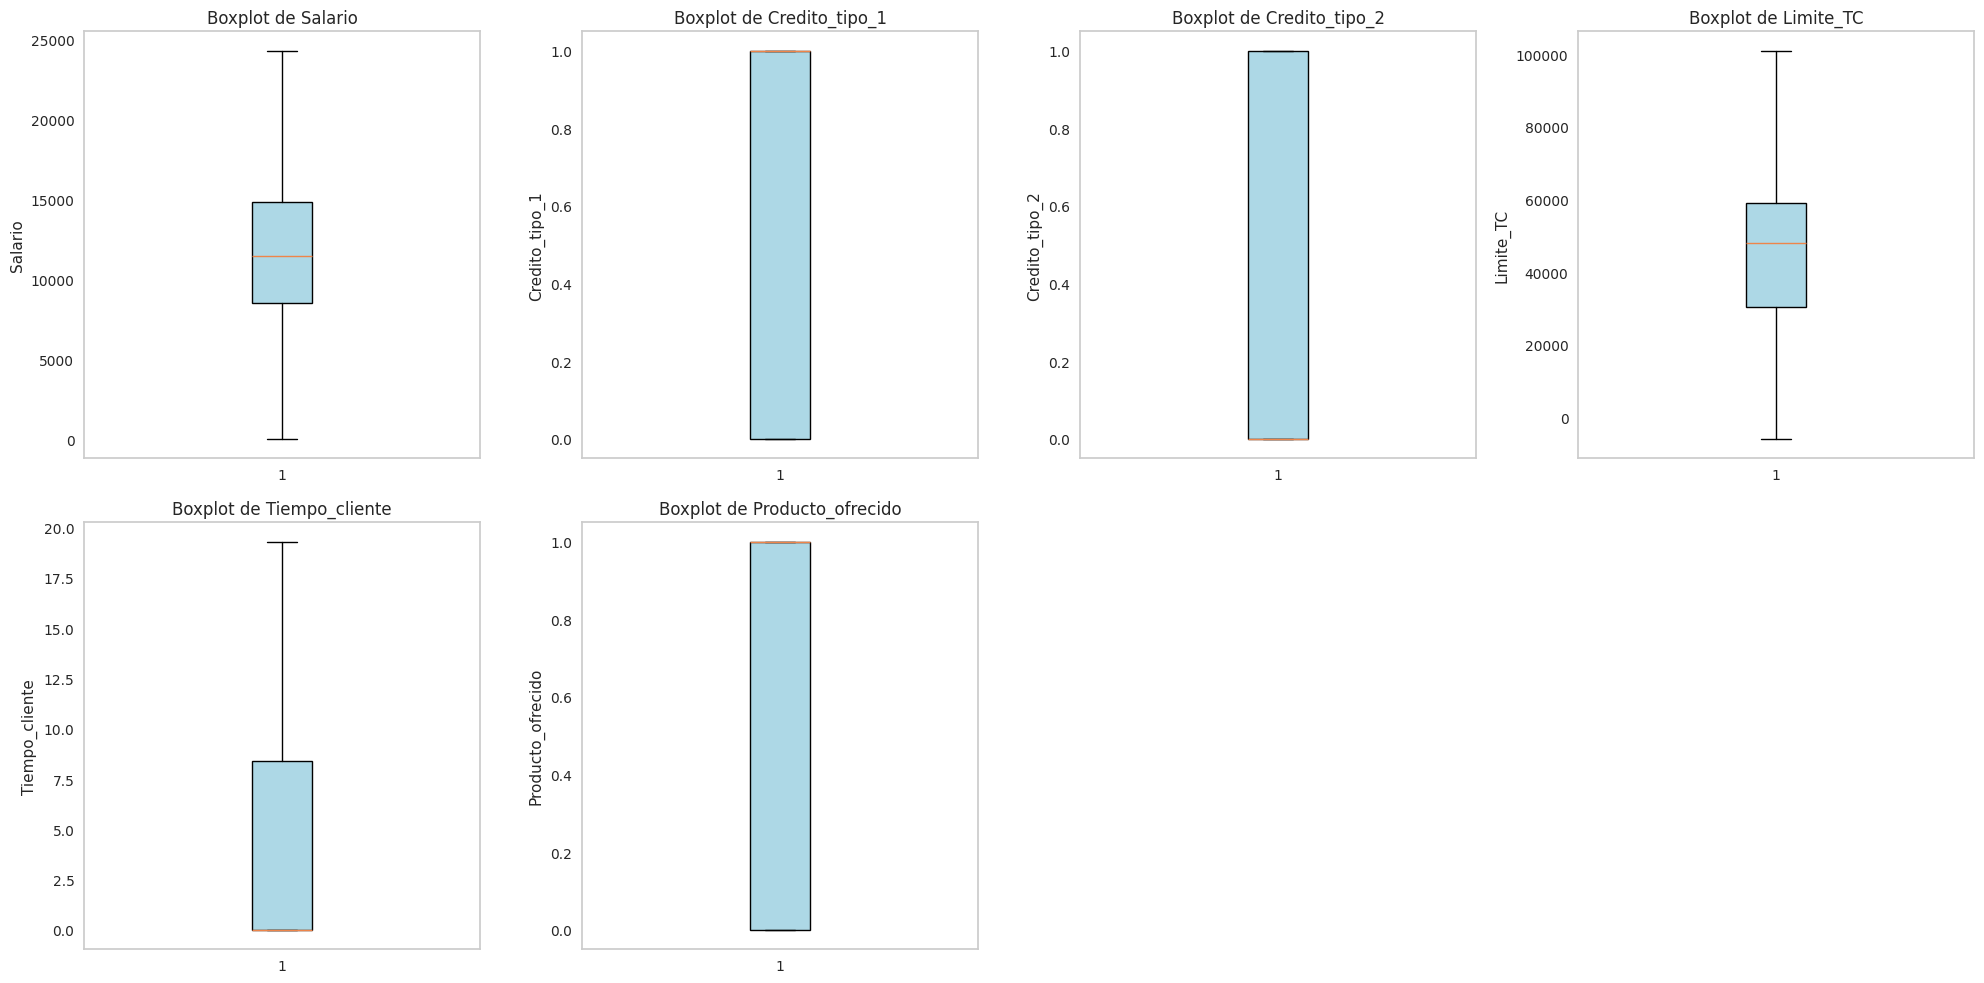

In [ ]:
import matplotlib.pyplot as plt

# Variables del dataset
variables = df.columns
num_vars = len(variables)
cols = 4
rows = (num_vars + cols - 1) // cols

# Crear subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Generar boxplots para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.boxplot(df[var].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_title(f'Boxplot de {var}')
    ax.set_ylabel(var)
    ax.grid()

# Eliminar los ejes vacíos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**En los gráficos de cajas, se puede corroborar visualmente que ya no hay outlier**

**Se corrobora que quedaron imputados todos los Outlier, quedando el mismo número de filas y columnas.**

In [ ]:
df.shape

(500, 6)

#Modelo

#Estandarización

**La estandarización, es un proceso que permite que todas las variables numéricas estén en la misma escala, lo cual permite mejorar el rendimiento de nuestro algoritmo.**

In [ ]:
scaler = StandardScaler()
df_sca = scaler.fit_transform(df)
df_sca

array([[ 2.27955089,  0.79959006, -0.91924885, -0.72472289, -0.90523228,
         0.81309874],
       [-0.26835932,  0.79959006,  1.08784471,  0.39715176, -0.90523228,
         0.81309874],
       [-0.3812716 , -1.25064086,  1.08784471, -1.29796935, -0.90523228,
        -1.22986292],
       ...,
       [ 0.66767146, -1.25064086,  1.08784471, -1.795149  , -0.90523228,
        -1.22986292],
       [ 1.12435963,  0.79959006, -0.91924885, -0.70658543, -0.90523228,
         0.81309874],
       [ 0.60204876,  0.79959006, -0.91924885,  1.79387548,  2.29561217,
         0.81309874]])

In [ ]:
df = pd.DataFrame (df_sca, columns = ['Salario', 'Limite_TC', 'Tiempo_cliente', 'Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido'])

In [ ]:
df.head()

,Salario,Limite_TC,Tiempo_cliente,Credito_tipo_1,Credito_tipo_2,Producto_ofrecido
0,2.279551,0.799590,-0.919249,-0.724723,-0.905232,0.813099
1,-0.268359,0.799590,1.087845,0.397152,-0.905232,0.813099
2,-0.381272,-1.250641,1.087845,-1.297969,-0.905232,-1.229863
3,0.426312,0.799590,-0.919249,-0.691525,-0.905232,0.813099
4,-1.134791,-1.250641,1.087845,-1.178996,-0.905232,-1.229863


#Se realiza el gráfico de codo.

**El gráfico de codo, ayuda a decidir en cuántos grupos (clusters) separar los datos. En el eje X están los números grupos a probar, y el eje Y está el  número que indica que tan bien están agrupados los datos. Sobre ese número de K, ya no mejora el resultado.**

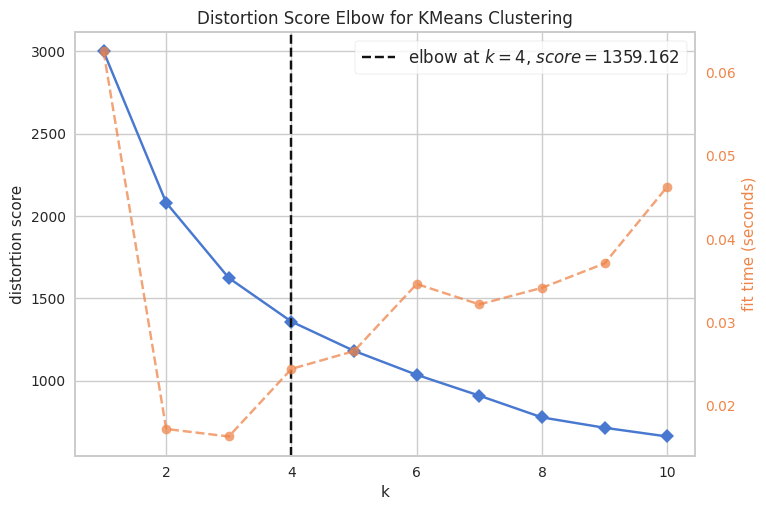

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from yellowbrick.cluster import KElbowVisualizer

# Iniciamos el modelo y el visualizador
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(df_sca) # Hacemos fit a los datos en el visualizador
visualizer.show() # Renderizamos la figura y la mostramos

#Análisis de componentes principales(PCA)

**El PCA, es una técnica que reduce la cantidad de columnas (variables) de un dataset, sin perder demasiada información importante. Toda la información queda guardada en menos columnas llamadas componentes, que capturan lo más importante de los datos. En este caso se utilizarán dos componentes principales.**
**Esta técnica, puede ayudar a mejorar la visualización de los datos y el rendimiento del algoritmo de clustering.**
**Desde aquí trabajaremos con la variable df1 ya que esta contiene los datos ya procesados para obtener un buen resultado.**

In [ ]:
df_sca = df[['Salario', 'Limite_TC', 'Tiempo_cliente', 'Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido']]

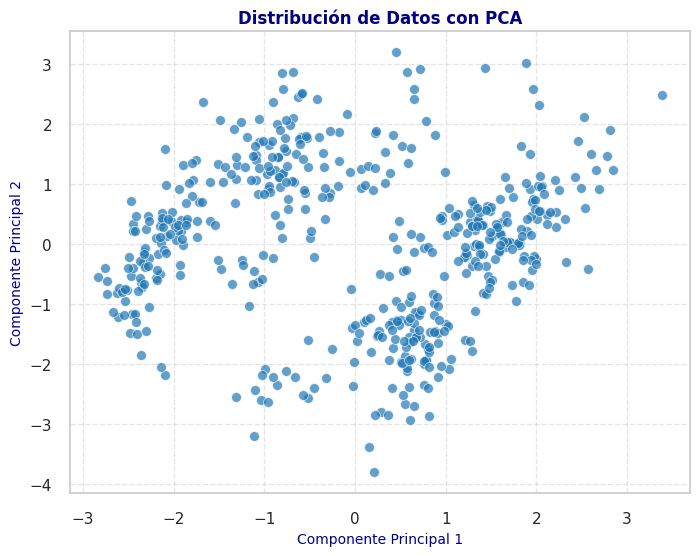

In [ ]:
pca = PCA(n_components=2) # Establecemos el PCA de 2 componentes
df1 = pca.fit_transform(df_sca) # Lo aplicamos a nuestro dataset codificado
# Gráficamos
df1_feature1 = df1[:,0]
df1_feature2 = df1[:,1]
sns.set(style="whitegrid", palette="muted")
# Graficamos con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1_feature1, y=df1_feature2, color="#1f77b4", s=50, alpha=0.7)
plt.title('Distribución de Datos con PCA', fontsize=12, fontweight='bold', color='navy')
plt.xlabel('Componente Principal 1', fontsize=10, color='darkblue')
plt.ylabel('Componente Principal 2', fontsize=10, color='darkblue')
# Agregamos una cuadrícula y mostramos el gráfico
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#Clustering jerárquico aglomerativo

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering_model_pca = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

In [ ]:
clustering_model_pca.fit(df1)

AgglomerativeClustering(n_clusters=4)

In [ ]:
data_labels_pca = clustering_model_pca.labels_

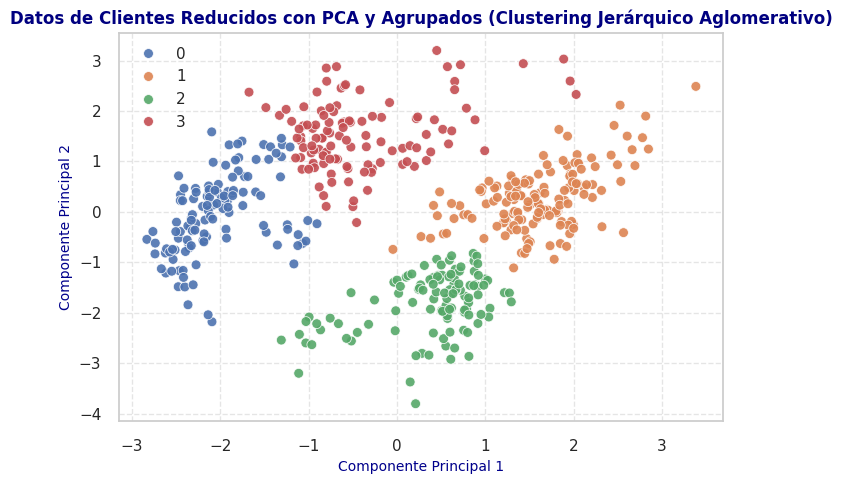

In [ ]:
# Graficamos con colores personalizados y mejora en el estilo
plt.figure(figsize=(7, 5))  # Tamaño del gráfico
sns.scatterplot(x=df1_feature1,
                y=df1_feature2,
                hue=data_labels_pca, palette="deep", s=50, alpha=0.9)
# Títulos
plt.title('Datos de Clientes Reducidos con PCA y Agrupados (Clustering Jerárquico Aglomerativo)',
          fontsize=12, fontweight='bold', color='navy')
plt.xlabel('Componente Principal 1', fontsize=10, color='darkblue')
plt.ylabel('Componente Principal 2', fontsize=10, color='darkblue')

# Agregamos cuadrícula y ajustamos el diseño
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()  # Ajusta el diseño para evitar que los títulos y etiquetas se corten

# Mostramos el gráfico
plt.show()

# Dendograma

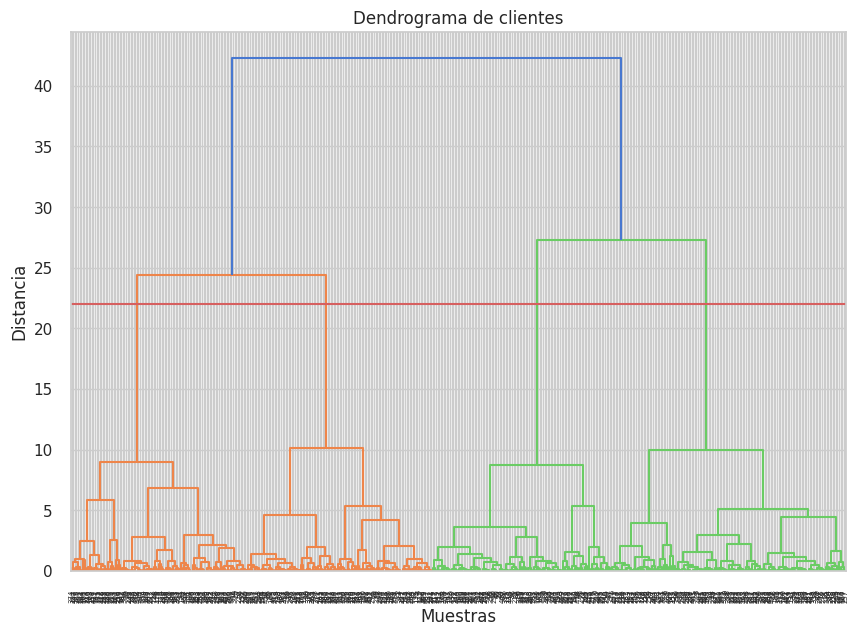

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrograma de clientes")
plt.xlabel('Muestras')
plt.ylabel('Distancia')

# Seleccionamos Annual Income y Spending Scores como indices
selected_data = df1
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 22, color = 'r', linestyle = '-')
plt.show()

Puede ser single, complete, ward, average

# Evaluación de modelo Clustering jerárquico aglomerativo

# Indices de desempeño

In [ ]:
# Generamos los scores
Silueta = metrics.silhouette_score(df1, data_labels_pca)
Calinski_Harabasz = metrics.calinski_harabasz_score(df1, data_labels_pca)
Davies_Bouldin = metrics.davies_bouldin_score(df1, data_labels_pca)

In [ ]:
# Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)

Score Analísis de silueta:  0.5067743826494516
Score indice Calinski-Harabasz :  668.8936954839852
Score indice Davies-Bouldin:  0.6689952070287517


**Índice de Silueta.**

**Parámetros: 1 bien, 0 en la frontera entre los cluster, -1 mal agrupados.**

**Resultado: 0.507.**

**Interpretación: Los clústeres son moderadamente buenos. Hay espacio para mejorar la separación y la compactación.**

*****

**Índice de Calinski-Harabasz.**

**Parámetro, lo más alto.**

**Resultado: 668.89.**

**Interpretación: Los clústeres parecen estar bien definidos y bien separados.**

***

**Índice Davies-Bouldin.**

**Parámetro: Lo más bajo posible.**

**Resultado: 0.669.**

**Interpretaciön: Los clústeres son compactos y bien separados, lo cual es una señal positiva.**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
# Inicializar las variables para los mejores k de cada métrica
best_k_silhouette = None
best_silhouette = -1  # El valor más bajo posible para silhouette_score es -1
best_k_ch = None
best_ch = -float('inf')  # El valor más bajo posible para Calinski-Harabasz es negativo infinito
best_k_db = None
best_db_score = float('inf')  # El valor más alto posible para Davies-Bouldin es infinito

# Iterar sobre diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df1)
    labels = kmeans.labels_

    # Calcular las métricas
    Silueta = metrics.silhouette_score(df1, labels)
    CH = calinski_harabasz_score(df1, labels)
    db_score = davies_bouldin_score(df1, labels)

    # Imprimir las métricas para el valor actual de k
    print(f"Silhouette score con k={k} : ", Silueta)
    print(f"CH Score con k={k} : ", CH)
    print(f"DB Score con k={k} : ", db_score)
    print()

    # Guardar el mejor k para Silhouette
    if Silueta > best_silhouette:
        best_silhouette = Silueta
        best_k_silhouette = k

    # Guardar el mejor k para Calinski-Harabasz
    if CH > best_ch:
        best_ch = CH
        best_k_ch = k

    # Guardar el mejor k para Davies-Bouldin
    if db_score < best_db_score:
        best_db_score = db_score
        best_k_db = k

# Imprimir los mejores k para cada métrica
print(f"\nMejor k según Silhouette Score: {best_k_silhouette} con un valor de {best_silhouette}")
print(f"Mejor k según Calinski-Harabasz Score: {best_k_ch} con un valor de {best_ch}")
print(f"Mejor k según Davies-Bouldin Score: {best_k_db} con un valor de {best_db_score}")

Silhouette score con k=2 :  0.46350953956232444
CH Score con k=2 :  431.78711490014064
DB Score con k=2 :  0.9451579035575681

Silhouette score con k=3 :  0.453690254925763
CH Score con k=3 :  429.19906888373947
DB Score con k=3 :  0.7513989622350973

Silhouette score con k=4 :  0.5319957681930937
CH Score con k=4 :  732.8091084957308
DB Score con k=4 :  0.6241914516020602

Silhouette score con k=5 :  0.49801484094993015
CH Score con k=5 :  653.4476670493358
DB Score con k=5 :  0.767804687714776

Silhouette score con k=6 :  0.44775972419602617
CH Score con k=6 :  636.0849652927182
DB Score con k=6 :  0.8236748720047453

Silhouette score con k=7 :  0.4462825446211649
CH Score con k=7 :  642.4274730528795
DB Score con k=7 :  0.8360841877649179

Silhouette score con k=8 :  0.3934390164991239
CH Score con k=8 :  598.7365664006215
DB Score con k=8 :  0.8920555929200951

Silhouette score con k=9 :  0.3771275584030989
CH Score con k=9 :  562.0274099441395
DB Score con k=9 :  0.894178351524462

**Se realiza la comparación con otros cluster y nos confirma que la mejor opción en K:4**

In [ ]:
data = df1
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([2, 3, 0, 2, 0, 1, 1, 3, 1, 1, 0, 3, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0,
       1, 2, 1, 2, 1, 3, 0, 0, 2, 1, 0, 0, 2, 1, 3, 2, 2, 3, 2, 1, 0, 1,
       2, 2, 2, 2, 3, 3, 1, 3, 0, 0, 1, 1, 1, 1, 1, 0, 2, 3, 1, 2, 1, 3,
       0, 0, 2, 1, 0, 1, 3, 1, 3, 1, 2, 2, 2, 2, 0, 1, 1, 3, 0, 1, 2, 2,
       1, 0, 1, 2, 3, 1, 1, 2, 2, 0, 2, 1, 2, 3, 3, 3, 2, 0, 3, 1, 0, 3,
       2, 1, 0, 1, 1, 2, 1, 2, 3, 1, 0, 0, 0, 3, 2, 0, 3, 0, 1, 3, 2, 3,
       0, 0, 3, 0, 2, 1, 0, 1, 2, 1, 3, 0, 2, 0, 0, 2, 3, 1, 1, 2, 1, 3,
       2, 0, 1, 3, 3, 1, 2, 1, 2, 1, 0, 0, 3, 1, 0, 3, 1, 3, 2, 2, 0, 0,
       2, 2, 3, 0, 1, 0, 1, 3, 0, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 1, 3, 0,
       2, 2, 3, 2, 0, 1, 1, 3, 3, 2, 3, 1, 0, 2, 2, 2, 3, 0, 3, 1, 2, 1,
       3, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 3, 3, 3,
       0, 1, 3, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 0, 3, 3, 2, 0, 1,
       0, 3, 3, 1, 1, 1, 1, 0, 1, 3, 0, 1, 3, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 1, 3, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2,

In [ ]:
df1 = pd.DataFrame(df1)
df1['Segmento'] = clustering_model.labels_

In [ ]:
df1['Segmento'].value_counts()

,count
Segmento,
1,152
0,119
2,115
3,114


In [ ]:
for segmento in sorted(df1['Segmento'].unique()):
  print('Segmento:',segmento)
  print(df1[df1['Segmento'] == segmento].describe().transpose())
  print()
  print()

Segmento: 0
          count      mean       std       min       25%       50%       75%  \
0         119.0 -2.028844  0.450497 -2.831925 -2.366938 -2.122641 -1.793972   
1         119.0 -0.054980  0.794350 -2.179247 -0.587728 -0.090366  0.412361   
Segmento  119.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               max  
0        -0.905415  
1         1.585557  
Segmento  0.000000  


Segmento: 1
          count      mean       std       min       25%       50%       75%  \
0         152.0  1.601819  0.556450 -0.045385  1.303836  1.588264  1.948249   
1         152.0  0.259805  0.610791 -1.111510 -0.142821  0.234221  0.561683   
Segmento  152.0  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   

               max  
0         3.384948  
1         2.487720  
Segmento  1.000000  


Segmento: 2
          count      mean       std       min       25%       50%       75%  \
0         115.0  0.394633  0.576282 -1.309712  0.213216  0.569916  0.782329   


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_sca)

In [ ]:
y_kmeans

array([2, 3, 0, 2, 0, 1, 1, 3, 1, 1, 0, 3, 2, 0, 1, 1, 3, 2, 0, 0, 3, 0,
       1, 2, 1, 2, 1, 3, 0, 0, 2, 1, 0, 0, 2, 1, 3, 2, 2, 3, 2, 1, 0, 1,
       2, 2, 2, 2, 0, 3, 2, 3, 0, 0, 1, 1, 1, 1, 1, 0, 2, 3, 1, 2, 1, 3,
       0, 0, 2, 1, 0, 1, 3, 1, 3, 1, 2, 2, 2, 2, 0, 1, 1, 3, 0, 1, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 0, 2, 1, 2, 1, 3, 3, 2, 0, 3, 1, 0, 3,
       2, 1, 0, 1, 1, 2, 1, 2, 3, 1, 0, 0, 0, 3, 2, 0, 3, 0, 1, 3, 2, 3,
       0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 3, 3, 2, 3, 0, 2, 3, 1, 1, 2, 1, 3,
       2, 0, 1, 3, 3, 1, 2, 1, 2, 1, 0, 3, 1, 2, 0, 3, 1, 3, 2, 2, 0, 0,
       2, 2, 3, 0, 1, 3, 1, 3, 0, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 1, 3, 0,
       2, 2, 3, 2, 0, 2, 1, 3, 3, 2, 3, 1, 0, 2, 2, 2, 3, 0, 3, 1, 2, 1,
       3, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 3, 0, 1, 3, 3, 3,
       0, 1, 3, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 0, 3, 3, 2, 0, 1,
       0, 3, 3, 1, 1, 1, 1, 0, 1, 3, 0, 1, 3, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       3, 1, 3, 0, 2, 1, 1, 1, 2, 1, 0, 3, 0, 1, 2,

In [ ]:
np.unique(y_kmeans, return_counts= True)

(array([0, 1, 2, 3], dtype=int32), array([106, 150, 123, 121]))

******

## RETO ADICIONAL

In [ ]:
df_nuevo1 = pd.read_csv('/content/drive/MyDrive/Bootcamp UDD/PROYECTO 4, ARCHIVO /new_costumer.csv')

In [ ]:
df_nuevo1.shape

(50, 7)

In [ ]:
df_nuevo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            50 non-null     float64
 1   Credito_tipo_1     50 non-null     int64  
 2   Credito_tipo_2     50 non-null     int64  
 3   Limite_TC          50 non-null     float64
 4   Tiempo_cliente     50 non-null     float64
 5   Producto_ofrecido  50 non-null     int64  
 6   Tipo_de_cliente    50 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.9 KB




1.   100 % Completitud. ok
2.   No hay duplicados. ok
1.   Se corrobora que no hay Outlier.







In [ ]:
df_nuevo1.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,50.0,13232.1144,5767.078320,-638.96,9783.8875,12849.835,16788.6725,23890.65
Credito_tipo_1,50.0,0.5200,0.504672,0.00,0.0000,1.000,1.0000,1.00
Credito_tipo_2,50.0,0.5000,0.505076,0.00,0.0000,0.500,1.0000,1.00
Limite_TC,50.0,38422.6698,20240.655015,-2756.45,22922.6175,39054.305,52052.3200,83578.93
Tiempo_cliente,50.0,2.9440,3.973338,0.00,0.0000,0.000,6.3500,11.30
Producto_ofrecido,50.0,0.7000,0.462910,0.00,0.0000,1.000,1.0000,1.00
Tipo_de_cliente,50.0,1.3800,1.122861,0.00,0.0000,1.000,2.0000,3.00


In [ ]:
df_nuevo1.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


**Se puede observar, de que existe una columna adicional, por lo que debemos dejarla con la misma estructura y columnas, del data set inicial**

**Se procede a eliminar la columna que sobra**

In [ ]:
df_nuevo = df_nuevo1.drop(['Tipo_de_cliente'], axis=1)
df_nuevo.head(5)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,19028.02,1,0,18845.91,0.0,1
1,17004.81,1,0,16421.36,0.0,0
2,12973.54,1,0,57295.44,9.6,1
3,13995.43,0,0,23556.17,7.7,0
4,13155.66,0,1,61073.59,10.2,1


In [ ]:
df.drop_duplicates(inplace=True) # Eliminar duplicados (Se agregó esta línea para asegurarnos de que no haya datos repetidos)

In [ ]:
df_nuevo.shape

(50, 6)

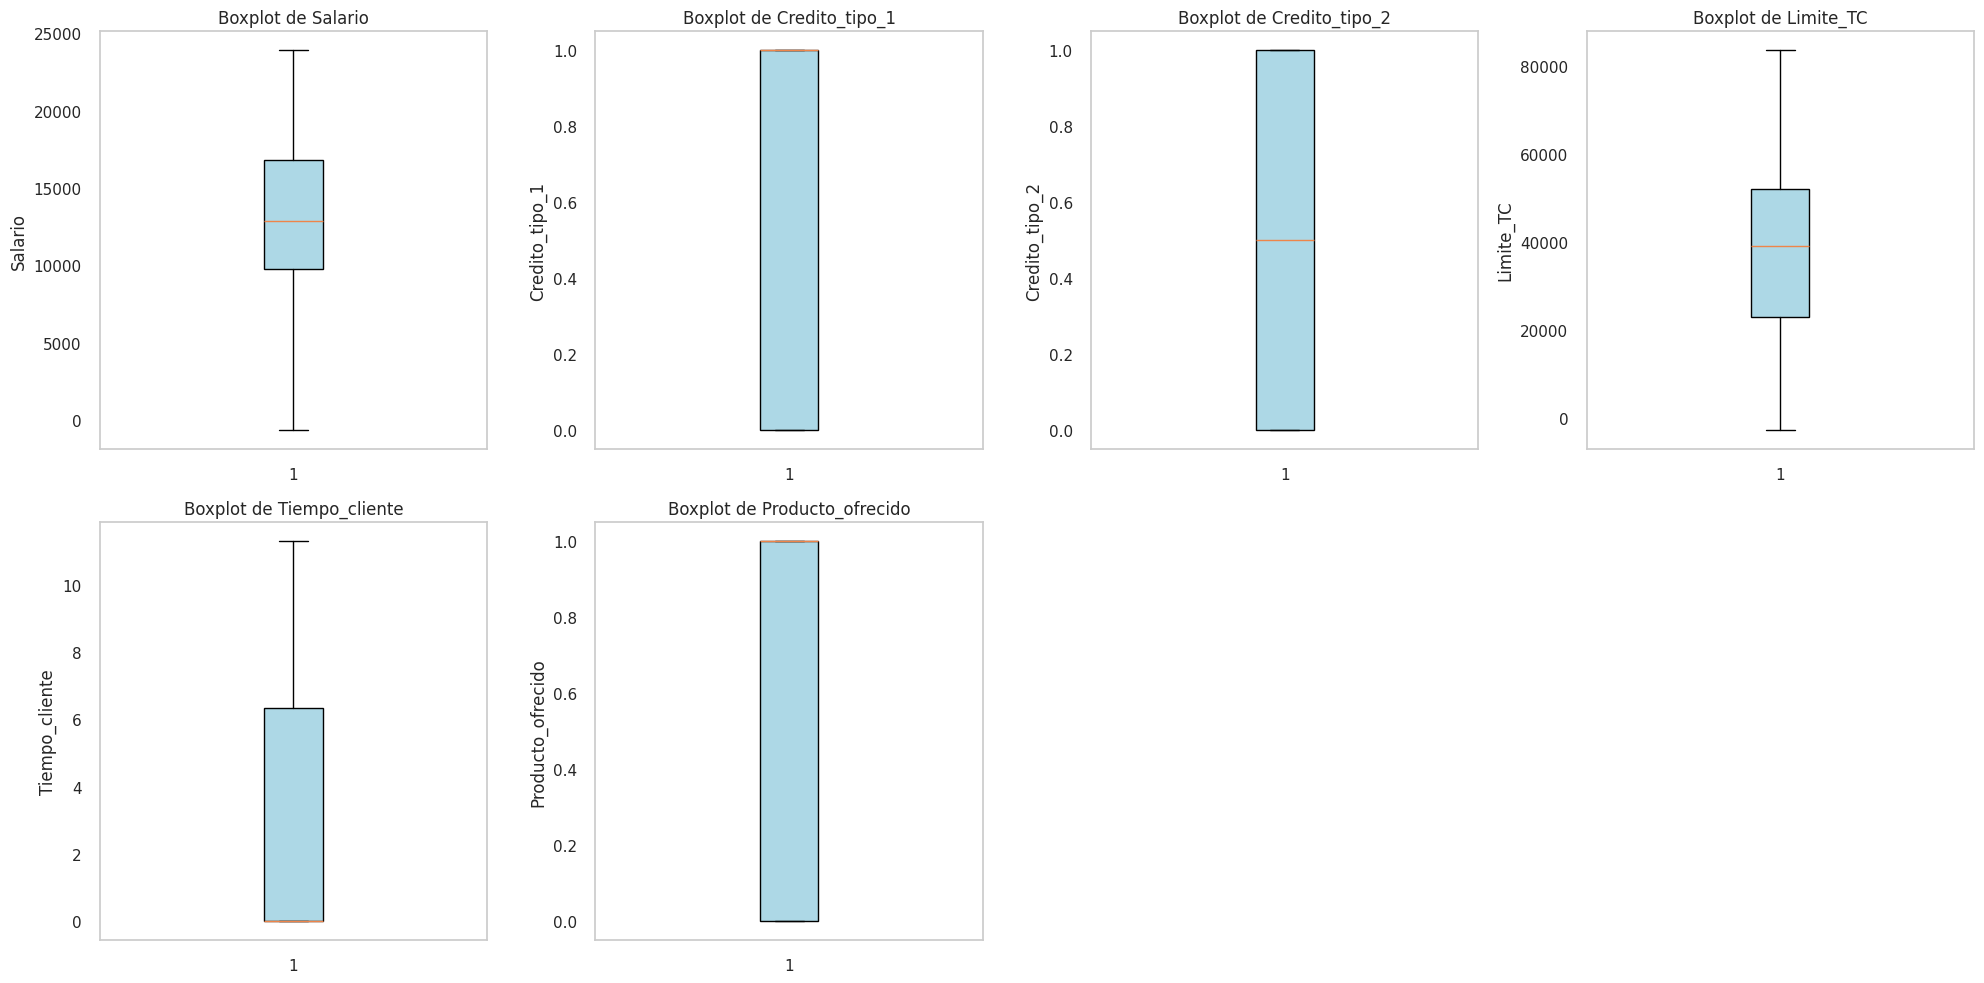

In [ ]:
# Variables del dataset
variables = df_nuevo.columns
num_vars = len(variables)
cols = 4
rows = (num_vars + cols - 1) // cols

# Crear subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Generar boxplots para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.boxplot(df_nuevo[var].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_title(f'Boxplot de {var}')
    ax.set_ylabel(var)
    ax.grid()

# Eliminar los ejes vacíos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

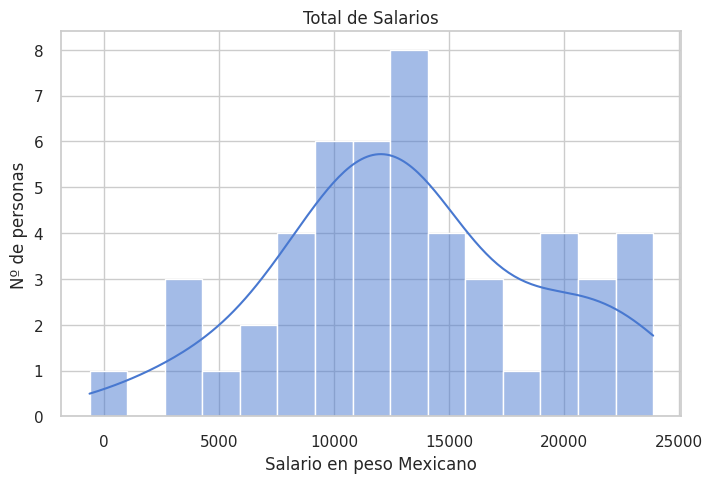

In [ ]:
sns.set_style("whitegrid")  # Fondo con cuadrícula suave
sns.set_palette("muted")   # Colores suaves

plt.figure(figsize=(8, 5))
sns.histplot(df_nuevo['Salario'], bins=15, kde=True)
plt.title("Total de Salarios")
plt.xlabel('Salario en peso Mexicano')
plt.ylabel("Nº de personas")
plt.show()

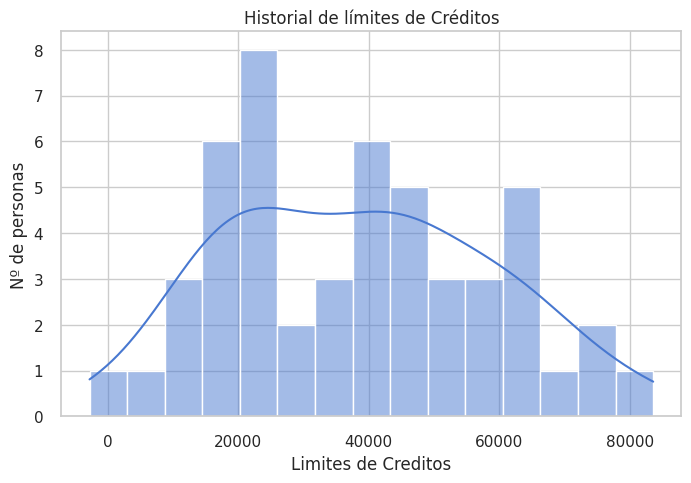

In [ ]:
sns.set_style("whitegrid")  # Fondo con cuadrícula suave
sns.set_palette("muted")   # Colores suaves

plt.figure(figsize=(8, 5))
sns.histplot(df_nuevo['Limite_TC'], bins=15, kde=True)
plt.title("Historial de límites de Créditos")
plt.xlabel('Limites de Creditos')
plt.ylabel("Nº de personas")
plt.show()

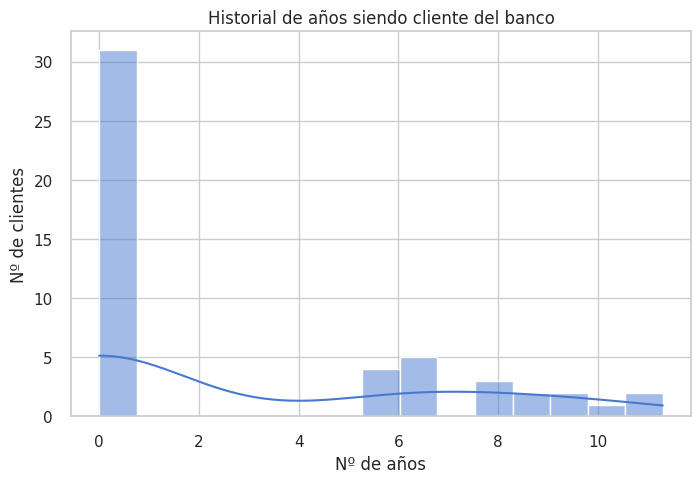

In [ ]:
sns.set_style("whitegrid")  # Fondo con cuadrícula suave
sns.set_palette("muted")

plt.figure(figsize=(8, 5))
sns.histplot(df_nuevo['Tiempo_cliente'], bins=15, kde=True)
plt.title("Historial de años siendo cliente del banco")
plt.xlabel('Nº de años')
plt.ylabel("Nº de clientes")
plt.show()

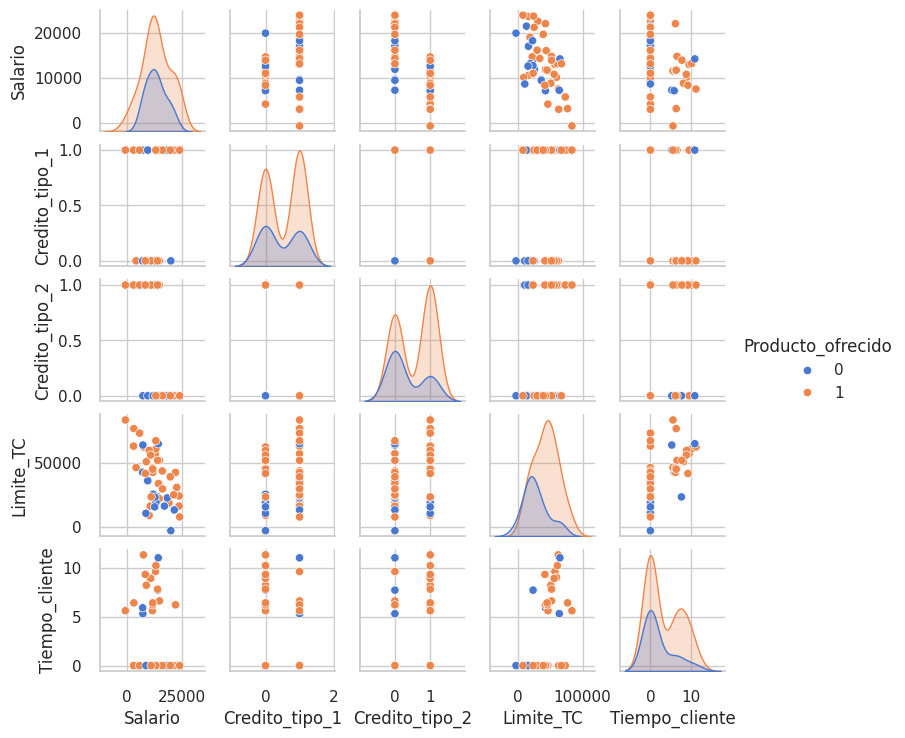

In [ ]:
sns.pairplot(df_nuevo, hue='Producto_ofrecido', height=1.5)
plt.show()

In [ ]:
scaler = StandardScaler()
df_nuevo_sca = scaler.fit_transform(df_nuevo)
df_nuevo_sca

array([[ 1.01520189,  0.96076892, -1.        , -0.97701945, -0.7484612 ,
         0.65465367],
       [ 0.66081954,  0.96076892, -1.        , -1.09802173, -0.7484612 ,
        -1.52752523],
       [-0.04529149,  0.96076892, -1.        ,  0.94188537,  1.69217315,
         0.65465367],
       [ 0.13370118, -1.040833  , -1.        , -0.741944  ,  1.20913094,
        -1.52752523],
       [-0.01339163, -1.040833  ,  1.        ,  1.13044191,  1.8447128 ,
         0.65465367],
       [-1.58281667, -1.040833  ,  1.        ,  0.39936367, -0.7484612 ,
         0.65465367],
       [-0.62287476,  0.96076892, -1.        , -0.11078179, -0.7484612 ,
        -1.52752523],
       [-1.75848484,  0.96076892,  1.        ,  1.9178508 ,  0.87862837,
         0.65465367],
       [-0.99706051, -1.040833  ,  1.        ,  1.20314908,  2.12436882,
         0.65465367],
       [-1.04398897,  0.96076892, -1.        ,  1.27731254,  0.59897235,
        -1.52752523],
       [-1.06365226, -1.040833  ,  1.        ,  0.

In [ ]:
df_nuevo = pd.DataFrame (df_nuevo_sca, columns = ['Salario', 'Limite_TC', 'Tiempo_cliente', 'Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido'])

In [ ]:
df_nuevo.head()

,Salario,Limite_TC,Tiempo_cliente,Credito_tipo_1,Credito_tipo_2,Producto_ofrecido
0,1.015202,0.960769,-1.0,-0.977019,-0.748461,0.654654
1,0.660820,0.960769,-1.0,-1.098022,-0.748461,-1.527525
2,-0.045291,0.960769,-1.0,0.941885,1.692173,0.654654
3,0.133701,-1.040833,-1.0,-0.741944,1.209131,-1.527525
4,-0.013392,-1.040833,1.0,1.130442,1.844713,0.654654


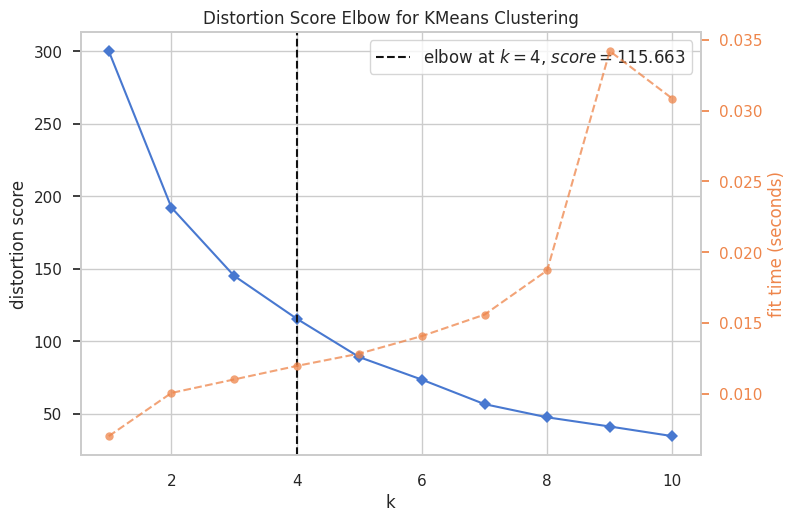

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from yellowbrick.cluster import KElbowVisualizer

# Iniciamos el modelo y el visualizador
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(df_nuevo_sca) # Hacemos fit a los datos en el visualizador
visualizer.show() # Renderizamos la figura y la mostramos

In [ ]:
df_nuevo_sca = df_nuevo[['Salario', 'Limite_TC', 'Tiempo_cliente', 'Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido']]

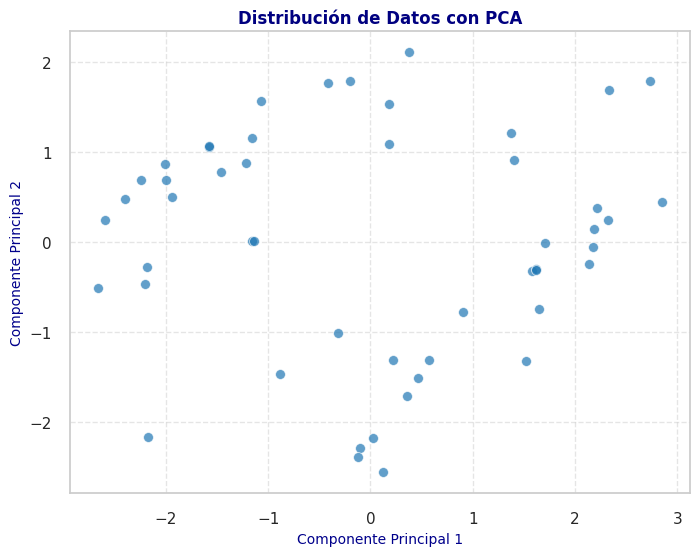

In [ ]:
pca = PCA(n_components=2) # Establecemos el PCA de 2 componentes
df1 = pca.fit_transform(df_nuevo_sca) # Lo aplicamos a nuestro dataset codificado
# Gráficamos
df1_feature1 = df1[:,0]
df1_feature2 = df1[:,1]
sns.set(style="whitegrid", palette="muted")
# Graficamos con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1_feature1, y=df1_feature2, color="#1f77b4", s=50, alpha=0.7)
plt.title('Distribución de Datos con PCA', fontsize=12, fontweight='bold', color='navy')
plt.xlabel('Componente Principal 1', fontsize=10, color='darkblue')
plt.ylabel('Componente Principal 2', fontsize=10, color='darkblue')
# Agregamos una cuadrícula y mostramos el gráfico
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
df_pca_nuevo = pca.fit_transform(df_nuevo_sca)

In [ ]:
aglomerativo_predict = clustering_model_pca.fit_predict(df_pca_nuevo)

Text(0.5, 1.0, 'Categorización Predicha')

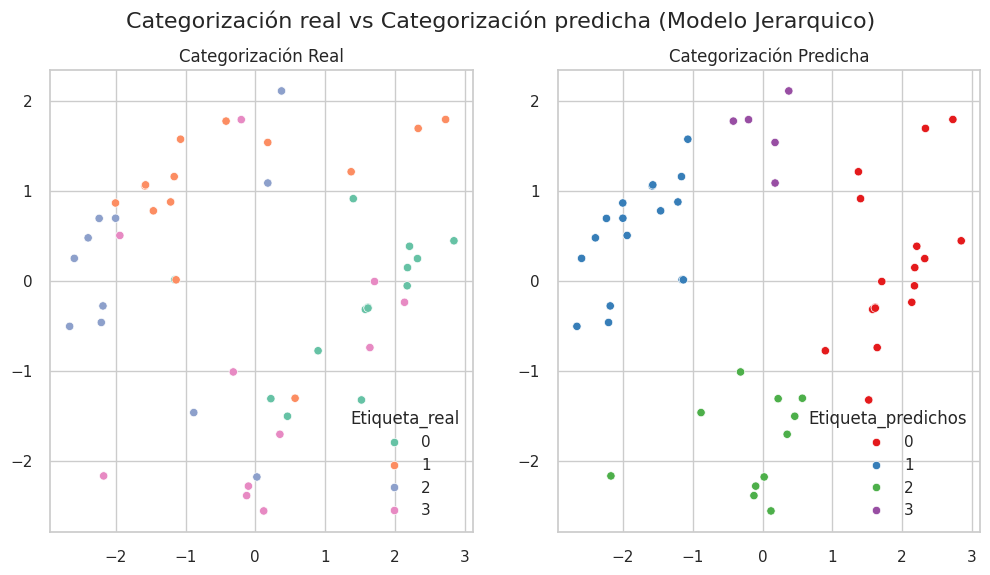

In [ ]:
# Crear DataFrame con las etiquetas y componentes principales
df_ag = pd.DataFrame(df_pca_nuevo, columns=['Columna_1', 'Columna_2'])
df_ag['Etiqueta_predichos'] = aglomerativo_predict
df_ag['Etiqueta_real'] = df_nuevo1['Tipo_de_cliente']

# Extraer componentes para graficar
df1_f1_real = df_pca_nuevo[:, 0]
df1_f2_real = df_pca_nuevo[:, 1]

# Crear figura con dos gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Categorización real vs Categorización predicha (Modelo Jerarquico)', fontsize=16)

# Definir paletas de colores personalizadas
palette_real = sns.color_palette("Set2")  # o ['#66c2a5', '#fc8d62', '#8da0cb'] si prefieres hex
palette_pred = sns.color_palette("Set1")  # o ['#e41a1c', '#377eb8', '#4daf4a']

# Gráfico de categorización real
sns.scatterplot(x=df1_f1_real,
                y=df1_f2_real,
                hue=df_ag['Etiqueta_real'],
                palette=palette_real,
                ax=axs[0]).set_title('Categorización Real')

# Gráfico de categorización predicha
sns.scatterplot(x=df1_f1_real,
                y=df1_f2_real,
                hue=df_ag['Etiqueta_predichos'],
                palette=palette_pred,
                ax=axs[1]).set_title('Categorización Predicha')

# K-Means Clustering (No Supervisado)

In [ ]:
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)

In [ ]:
kmeans.fit(df_pca_nuevo)
labels_kmeans = kmeans.labels_

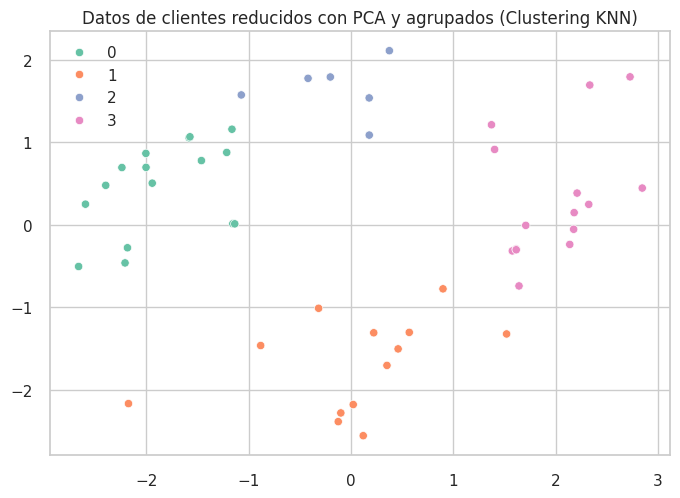

In [ ]:
sns.scatterplot(
    x=df1_feature1,
    y=df1_feature2,
    hue=labels_kmeans,
    palette='Set2'  # 👈 paleta Set2
).set_title('Datos de clientes reducidos con PCA y agrupados (Clustering KNN)')

plt.show()

# Evaluación K-Means Clustering (No Supervisado)

In [ ]:
# Generamos los scores
Silueta = metrics.silhouette_score(df1, labels_kmeans)
Calinski_Harabasz = metrics.calinski_harabasz_score(df1, labels_kmeans)
Davies_Bouldin = metrics.davies_bouldin_score(df1, labels_kmeans)

In [ ]:
# Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)

Score Analísis de silueta:  0.5130706540120814
Score indice Calinski-Harabasz :  75.24929910190664
Score indice Davies-Bouldin:  0.5800107259684057


**Índice de Silueta.**

**Parámetros: 1 bien, 0 en la frontera entre los cluster, -1 mal agrupados.**

**Resultado: 0.51.**

**Interpretación: Los clústeres son moderadamente buenos. Hay espacio para mejorar la separación y la compactación.**

*****

**Índice de Calinski-Harabasz.**

**Parámetro, lo más alto.**

**Resultado: 75.**

**Interpretación: Los clústeres parecen estar bien definidos y bien separados.**

***

**Índice Davies-Bouldin.**

**Parámetro: Lo más bajo posible.**

**Resultado: 0.58.**

**Interpretaciön: Los clústeres son compactos y bien separados, lo cual es una señal positiva.**

In [ ]:
kmeans_predict = kmeans.fit_predict(df_pca_nuevo)

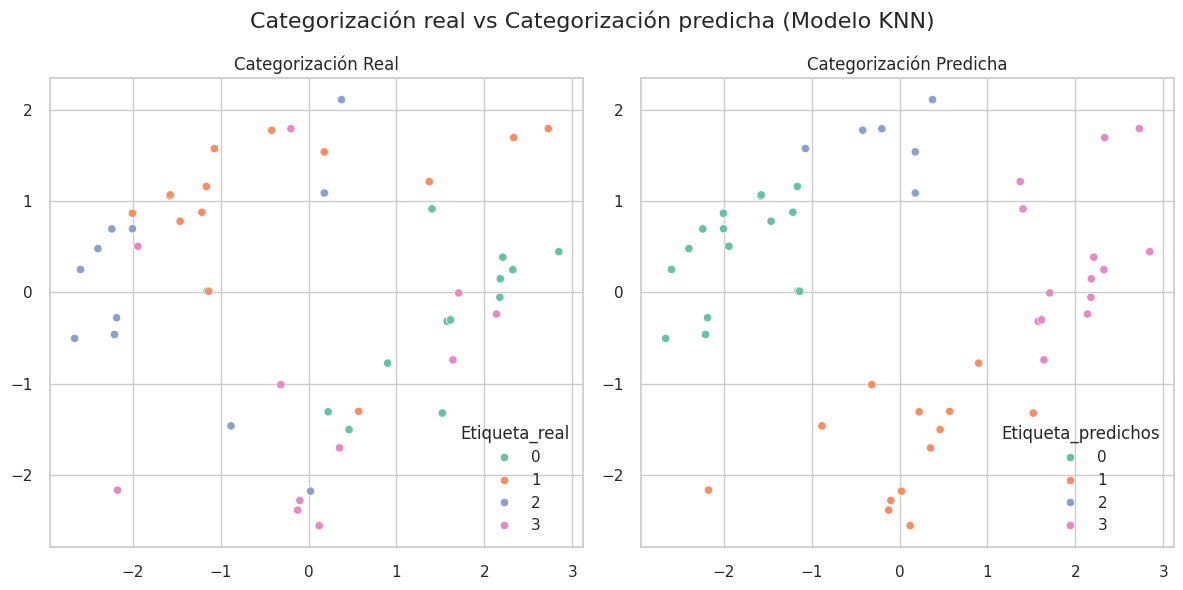

In [ ]:
# Crear DataFrame con resultados
df_km = pd.DataFrame(df_pca_nuevo, columns= ['Columna_1', 'Columna_2'])
df_km['Etiqueta_predichos'] = kmeans_predict
df_km['Etiqueta_real'] = df_nuevo1['Tipo_de_cliente']

# Separar columnas para graficar
df1_f1_real = df_pca_nuevo[:,0]
df1_f2_real = df_pca_nuevo[:,1]

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Categorización real vs Categorización predicha (Modelo KNN)', fontsize=16)

# Gráfico 1: Categorización real con Set2
sns.scatterplot(x=df1_f1_real, y=df1_f2_real, hue=df_km['Etiqueta_real'],
    palette='Set2', ax=axs[0]).set_title('Categorización Real')

# Gráfico 2: Categorización predicha con Set2
sns.scatterplot(x=df1_f1_real, y=df1_f2_real, hue=df_km['Etiqueta_predichos'],
    palette='Set2', ).set_title('Categorización Predicha')

plt.tight_layout()
plt.show()